In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [46]:
cust = pd.read_csv('Connect_Mobile__Attrition_Data_file.csv') #csv file of churn data

In [47]:
cust.head()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,1268.8,85,4,1,0,121,4,85
1,0,1581,1264.8,85,4,1,0,133,4,85
2,0,1594,1275.2,82,4,1,0,118,4,85
3,0,1594,1275.2,82,4,1,0,123,4,85
4,1,1609,1287.2,80,4,1,0,177,4,85


In [48]:
cust.describe()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,0.578590,1855.279910,1409.669662,58.402450,4.012840,1.385410,0.123480,95.816450,3.31673,81.668540
std,0.493787,2712.385257,2174.330870,18.643736,0.285265,1.617101,0.328989,50.161327,1.24147,9.952554
min,0.000000,1130.000000,904.000000,-20.000000,3.000000,0.000000,0.000000,30.000000,1.00000,72.000000
25%,0.000000,1674.000000,1248.650000,47.000000,4.000000,0.000000,0.000000,45.000000,3.00000,78.000000
50%,1.000000,1805.000000,1358.400000,56.000000,4.000000,1.000000,0.000000,87.000000,4.00000,81.000000
75%,1.000000,1907.000000,1494.400000,70.000000,4.000000,2.000000,0.000000,133.000000,4.00000,85.000000
max,1.000000,229821.000000,183856.800000,449.000000,6.000000,9.000000,1.000000,181.000000,7.00000,332.000000


In [49]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
active_cust                   100000 non-null int64
income                        100000 non-null int64
expenditure                   100000 non-null float64
months_on_network             100000 non-null int64
Num_complaints                100000 non-null int64
number_plan_changes           100000 non-null int64
relocated                     100000 non-null int64
monthly_bill                  100000 non-null int64
technical_issues_per_month    100000 non-null int64
Speed_test_result             100000 non-null int64
dtypes: float64(1), int64(9)
memory usage: 7.6 MB


In [50]:
cust.groupby('active_cust').mean()

,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
active_cust,,,,,,,,,
0,1851.463658,1419.705083,54.293016,4.040744,1.921834,0.270378,99.352199,3.695309,79.844807
1,1858.059438,1402.360468,61.395513,3.992516,0.994711,0.016488,93.241224,3.040996,82.996837


## EDA

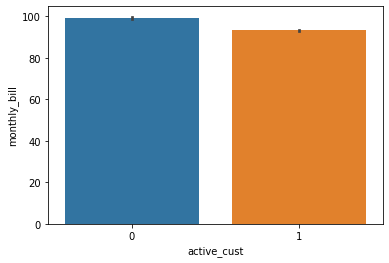

In [51]:
sns.barplot(x='active_cust' , y= 'monthly_bill' , data = cust) 

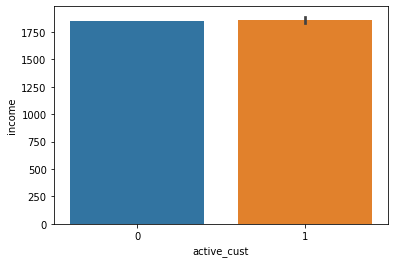

In [52]:
sns.barplot(x='active_cust' , y= 'income' , data = cust)

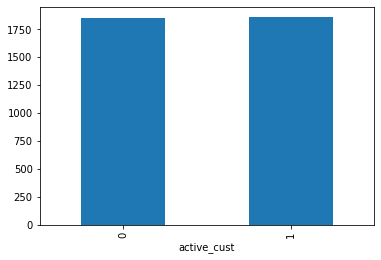

In [53]:
cust.groupby('active_cust')['income'].mean().plot.bar()

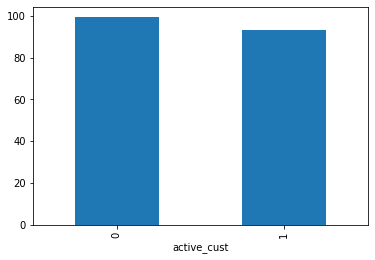

In [54]:
cust.groupby('active_cust')['monthly_bill'].mean().plot.bar()

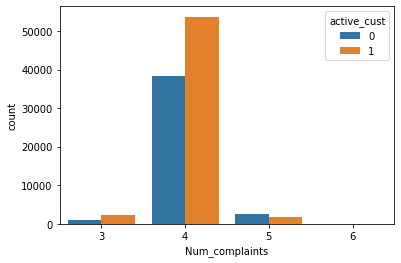

In [55]:
sns.countplot(x = 'Num_complaints' , hue = 'active_cust' , data = cust)

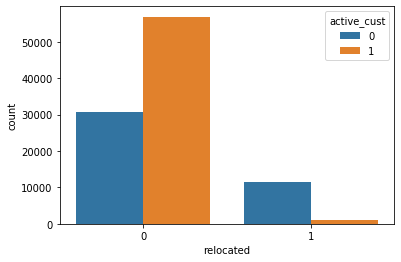

In [56]:
sns.countplot(x = 'relocated' , hue = 'active_cust' , data = cust)

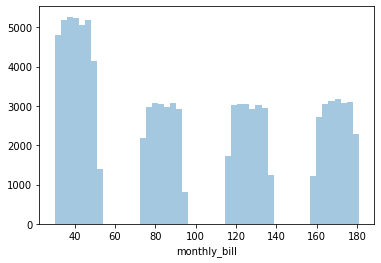

In [57]:
sns.distplot(cust['monthly_bill'], kde = False,bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CA6DA814C8>,
      dtype=object)

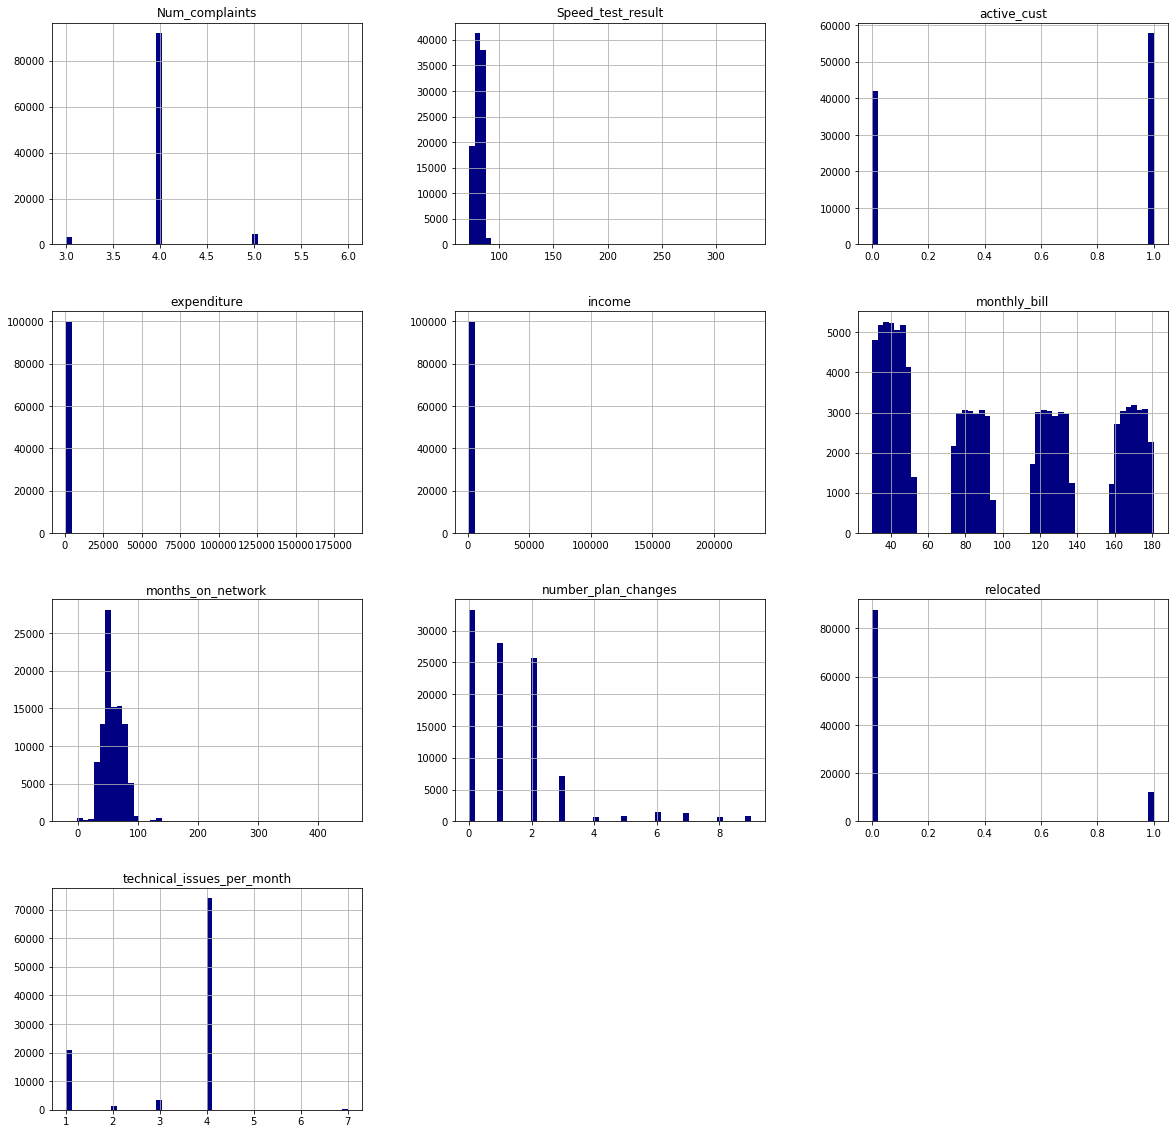

In [58]:
cust.hist(bins=50,figsize=(20,20),color='navy')

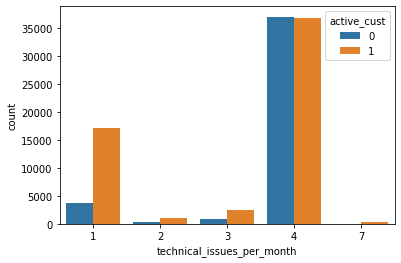

In [59]:
sns.countplot(x = 'technical_issues_per_month',hue = 'active_cust', data = cust)

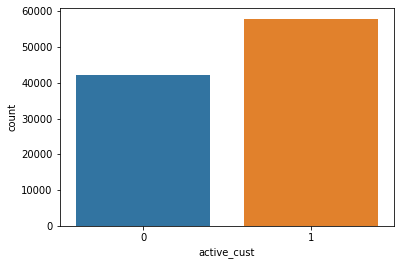

In [60]:
sns.countplot(cust['active_cust'])

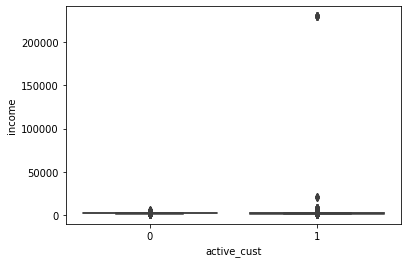

In [61]:
sns.boxplot(x= 'active_cust', y = 'income', data = cust)

In [62]:
cust.active_cust

0        0
1        0
2        0
3        0
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: active_cust, Length: 100000, dtype: int64

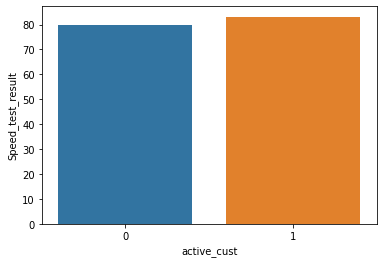

In [63]:
sns.barplot(x='active_cust' , y= 'Speed_test_result' , data = cust)

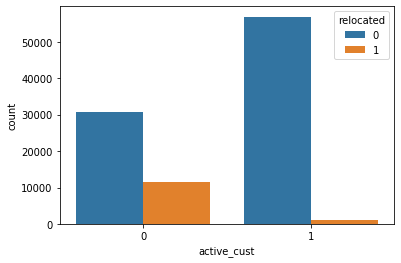

In [64]:
sns.countplot(x='active_cust' , hue = 'relocated' , data = cust)

In [65]:
cust['savings'] = cust['income'] - cust['expenditure'] #create a new feature savings which is diff between income and expenditure 

In [66]:
cust.head()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result,savings
0,0,1586,1268.8,85,4,1,0,121,4,85,317.2
1,0,1581,1264.8,85,4,1,0,133,4,85,316.2
2,0,1594,1275.2,82,4,1,0,118,4,85,318.8
3,0,1594,1275.2,82,4,1,0,123,4,85,318.8
4,1,1609,1287.2,80,4,1,0,177,4,85,321.8


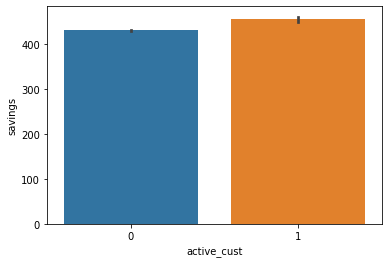

In [67]:
sns.barplot( x = 'active_cust' , y = 'savings', data = cust )

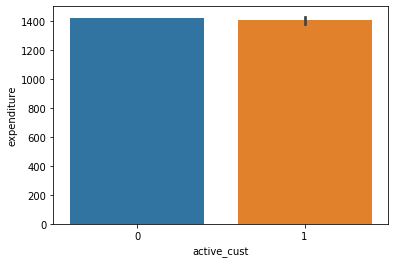

In [69]:
sns.barplot(x='active_cust' , y= 'expenditure' , data = cust)

In [70]:
cust.corr(method ='pearson')

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result,savings
active_cust,1.000000,0.001201,-0.003939,0.188113,-0.083481,-0.283100,-0.381069,-0.060156,-0.260249,0.156385,0.021303
income,0.001201,1.000000,0.998436,-0.122607,0.003102,-0.003567,0.001924,-0.004715,-0.002584,0.010451,0.975720
expenditure,-0.003939,0.998436,1.000000,-0.118989,0.000491,-0.007847,0.001288,-0.006006,-0.005726,0.015505,0.961951
months_on_network,0.188113,-0.122607,-0.118989,1.000000,-0.081782,0.022509,-0.045471,0.008030,-0.040707,0.020413,-0.133057
Num_complaints,-0.083481,0.003102,0.000491,-0.081782,1.000000,0.073773,0.053539,0.004960,0.019577,0.004148,0.013238
number_plan_changes,-0.283100,-0.003567,-0.007847,0.022509,0.073773,1.000000,0.595560,0.025379,0.180283,-0.009434,0.013309
relocated,-0.381069,0.001924,0.001288,-0.045471,0.053539,0.595560,1.000000,0.019341,0.113460,0.015136,0.004356
monthly_bill,-0.060156,-0.004715,-0.006006,0.008030,0.004960,0.025379,0.019341,1.000000,0.126871,-0.000345,0.000486
technical_issues_per_month,-0.260249,-0.002584,-0.005726,-0.040707,0.019577,0.180283,0.113460,0.126871,1.000000,-0.054988,0.009802
Speed_test_result,0.156385,0.010451,0.015505,0.020413,0.004148,-0.009434,0.015136,-0.000345,-0.054988,1.000000,-0.009670


In [71]:
cust.to_csv('churn.csv', index = False)

In [72]:
cust1 = pd.read_csv('churn.csv')

In [73]:
cust1.head()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result,savings
0,0,1586,1268.8,85,4,1,0,121,4,85,317.2
1,0,1581,1264.8,85,4,1,0,133,4,85,316.2
2,0,1594,1275.2,82,4,1,0,118,4,85,318.8
3,0,1594,1275.2,82,4,1,0,123,4,85,318.8
4,1,1609,1287.2,80,4,1,0,177,4,85,321.8


In [74]:
cust1.drop(['income','expenditure'], axis=1, inplace=True) #drop unnecessary features

In [75]:
features = cust1.drop('active_cust',axis=1)
labels = cust1['active_cust']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [76]:
from sklearn.ensemble import RandomForestClassifier #create a random forest object
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

C:\Users\VIVEK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
pred = rf.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [79]:
accuracy = round(accuracy_score(y_test, pred), 3)

In [80]:
print((accuracy))

0.893


In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     12595
           1       0.91      0.91      0.91     17405

    accuracy                           0.89     30000
   macro avg       0.89      0.89      0.89     30000
weighted avg       0.89      0.89      0.89     30000

